In [1]:
# Import required libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
#Import RDKit and Mordred libraries
from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors

In [3]:
#Allows figures to be visualized in jupyter notebook
%matplotlib inline

In [4]:
# Sets Pandas Display to Monitor Code
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [5]:
# Create Mordred Calculator
calc = Calculator(descriptors, ignore_3D=True)

#Get Mordred calcs
def get_Mordred(data_input):
    # Assigns Reactants Mordred Info
    reactants = data_input['Substrate']
    
    reactants_mol_list = []
    for inChi_reactants in reactants:
      reactants_mol = Chem.MolFromInchi(inChi_reactants)
      reactants_mol_list.append(reactants_mol)

    # Puts reactants into Pandas Type
    reactant_data = []
    reactant_data = calc.pandas(reactants_mol_list)
       
    #Joins Mordred parameters with experimental, atomic charges, and JChem for Excel parameters
    add_reactants = pd.concat((data_input, reactant_data), axis=1)
    
    #Force any non-numeric entries as NaN and replace them with 0
    int_data = add_reactants.apply(pd.to_numeric, errors='coerce')
    
    output = int_data.fillna(0)#, inplace=True)

    return output

In [6]:
# Read Training/Test data input File
data = pd.read_csv('BorylationTrainingTest 1-10-25.csv')

#Convert substrates to Mordred features
data = get_Mordred(data)

100%|██████████| 971/971 [01:23<00:00, 11.64it/s]


In [7]:
# Seperate dataset as response variable (Product Ratio) and feature variables
#Note: Product Ratio is described as "0" for non-borylating sites and "1" for borylating sites
X = data.drop('Product_Ratio' , axis = 1)
y = data['Product_Ratio']

In [8]:
X = X[['Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge', 
                           'ESP Hydrogen Charge', 'NPA Hydrogen Charge', 'Mulliken Heavy Charge', 'Mulliken Hydrogen Charge', 
                           'Steric Effect Index', 'Atomic_Polarizability', 'Distance Degree','Dreiding Energy',
                           'AATS2d', 'AATS1s', 'AATS2Z', 'AATS0v', 'AATS4p', 'AATS1i', 'ATSC1d', 'ATSC2d', 'AATSC2dv', 'AATSC4d',
                           'AATSC3Z', 'AATSC5v', 'AATSC1pe', 'MATS1c', 'MATS5s', 'MATS1p', 'GATS3c', 'GATS4c', 'GATS1v', 'GATS2pe', 'BCUTZ-1l', 'RPCG', 'FilterItLogS']]

X = X.rename(columns = {'Hirshfeld Heavy Atom Charge':'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge':'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge':'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge':'ESP Heavy Atom Charge', 
                        'ESP Hydrogen Charge':'ESP Hydrogen Charge', 'NPA Hydrogen Charge':'NPA Hydrogen Charge', 'Mulliken Heavy Charge':'Mulliken Heavy Atom Charge', 'Mulliken Hydrogen Charge':'Mulliken Hydrogen Charge', 
                        'Steric Effect Index':'Steric Effect Index', 'Atomic_Polarizability':'Atomic Polarizability', 'Distance Degree':'Distance Degree', 'Dreiding Energy':'Dreiding Energy', 
                        'AATS2d':'AATS2d', 'AATS1s':'AATS1s', 'AATS2Z':'AATS2Z', 'AATS0v':'AATS0v', 'AATS4p':'AATS4p', 'AATS1i':'AATS1i', 'ATSC1d':'ATSC1d', 'ATSC2d':'ATSC2d', 'AATSC2dv':'AATSC2dv', 'AATSC4d':'AATSC4d',
                        'AATSC3Z':'AATSC3Z', 'AATSC5v':'AATSC5v', 'AATSC1pe':'AATSC1pe', 'MATS1c':'MATS1c', 'MATS5s':'MATS5s', 'MATS1p':'MATS1p', 'GATS3c':'GATS3c', 'GATS4c':'GATS4c', 'GATS1v':'GATS1v', 'GATS2pe':'GATS2pe', 'BCUTZ-1l':'BCUTZ-1l', 'RPCG':'RPCG', 'FilterItLogS':'FilterItLogS'})
 

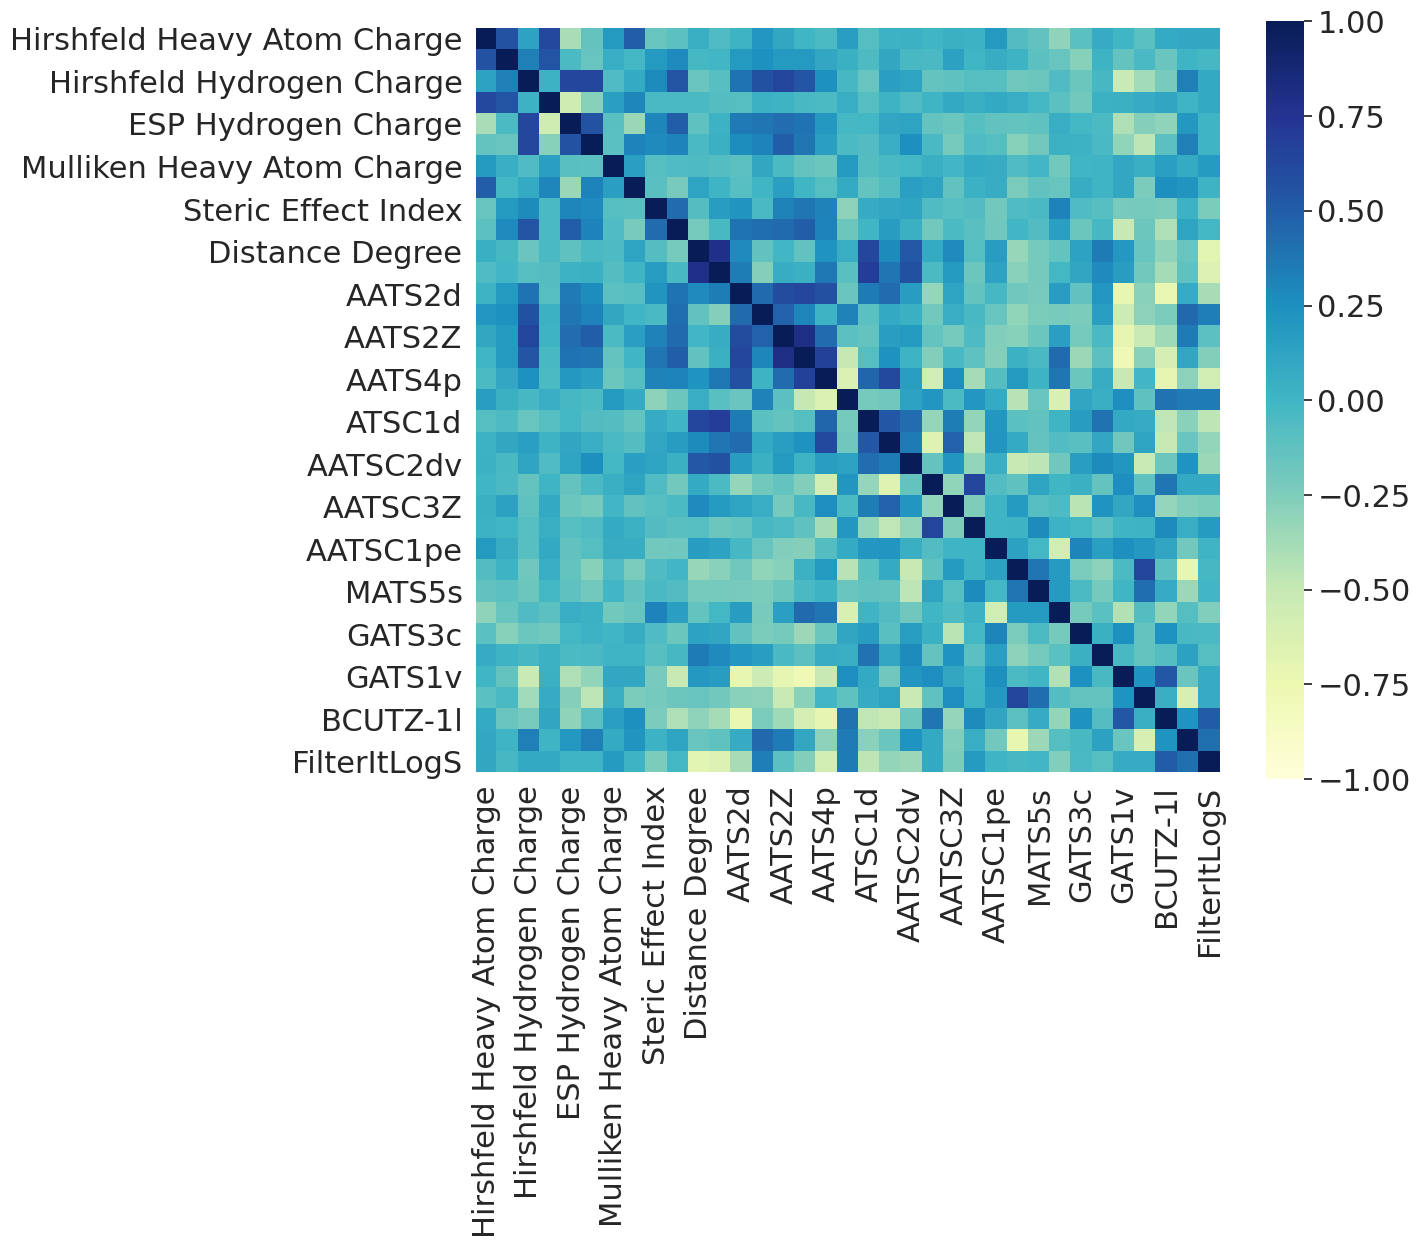

In [9]:
#Visualize the spearman correlation of the final features of dataset

corr_matrix = X.corr(method='spearman')
sns.set(font_scale=2.0)
plt.figure(figsize = (12, 12))#,dpi=1000)
ax = sns.heatmap(
    corr_matrix, 
    annot =False,
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True,
    cbar_kws={'shrink': 0.82},
    annot_kws={"size": 5},  
    xticklabels = "auto",
    yticklabels = "auto"
   )
plt.yticks(fontsize=22)
plt.xticks(fontsize=22, rotation=90)
plt.savefig('CorrelationFigure1-13-25.tiff', bbox_inches='tight',dpi=1000)
plt.show()

In [10]:
corr_matrix.to_csv("corr_matrix.csv", index=False)

In [11]:
corr_matrix

,Hirshfeld Heavy Atom Charge,Hirshfeld Carbon Charge,Hirshfeld Hydrogen Charge,ESP Heavy Atom Charge,ESP Hydrogen Charge,NPA Hydrogen Charge,Mulliken Heavy Atom Charge,Mulliken Hydrogen Charge,Steric Effect Index,Atomic Polarizability,Distance Degree,Dreiding Energy,AATS2d,AATS1s,AATS2Z,AATS0v,AATS4p,AATS1i,ATSC1d,ATSC2d,AATSC2dv,AATSC4d,AATSC3Z,AATSC5v,AATSC1pe,MATS1c,MATS5s,MATS1p,GATS3c,GATS4c,GATS1v,GATS2pe,BCUTZ-1l,RPCG,FilterItLogS
Hirshfeld Heavy Atom Charge,1.000000,0.564983,0.134879,0.632423,-0.392775,-0.146534,0.193867,0.503417,-0.152834,-0.114091,0.051925,-0.061092,0.018420,0.210394,0.095893,0.000592,-0.044521,0.161380,-0.081507,0.025123,0.033549,0.005570,0.046722,0.025394,0.188521,-0.066317,-0.126885,-0.297348,-0.106105,0.075400,0.001785,-0.102601,0.084928,0.102295,0.099580
Hirshfeld Carbon Charge,0.564983,1.000000,0.335059,0.558757,-0.041414,-0.153681,0.057360,-0.009165,0.188573,0.285760,-0.018069,-0.001507,0.193184,0.243816,0.191519,0.194914,0.104862,0.044891,-0.048298,0.094878,-0.030367,-0.032775,0.146115,0.006580,0.069506,0.022388,-0.110704,-0.150502,-0.273550,0.021840,-0.146258,-0.032529,-0.156350,0.014468,-0.016660
Hirshfeld Hydrogen Charge,0.134879,0.335059,1.000000,0.023790,0.634262,0.636861,-0.056561,0.085200,0.280674,0.554597,-0.160083,-0.086119,0.393178,0.571848,0.642532,0.552828,0.242516,-0.016477,-0.150671,0.154240,0.128383,-0.142148,-0.120309,-0.082955,-0.089884,-0.181751,-0.179016,-0.062112,-0.170398,-0.021244,-0.509015,-0.373262,-0.226178,0.334914,0.091416
ESP Heavy Atom Charge,0.632423,0.558757,0.023790,1.000000,-0.552343,-0.278909,0.153494,0.300195,-0.034842,-0.033040,-0.036973,-0.073143,-0.081412,0.034917,0.019601,-0.024271,-0.042831,0.059383,-0.080268,0.015875,-0.061970,0.012981,0.089514,0.049623,0.089720,0.056417,-0.009192,-0.116953,-0.189612,0.031578,0.040093,0.075555,0.112787,0.012098,0.093272
ESP Hydrogen Charge,-0.392775,-0.041414,0.634262,-0.552343,1.000000,0.565817,-0.098603,-0.341129,0.297518,0.503195,-0.120837,0.023744,0.363117,0.389900,0.428753,0.394198,0.200529,-0.017792,-0.014322,0.113467,0.119871,-0.141875,-0.165508,-0.083321,-0.126881,-0.134656,-0.123127,0.057150,-0.011170,-0.046180,-0.406551,-0.271471,-0.298292,0.198313,0.008944
NPA Hydrogen Charge,-0.146534,-0.153681,0.636861,-0.278909,0.565817,1.000000,-0.105146,0.316729,0.288280,0.319806,-0.031439,0.043037,0.268519,0.317926,0.504201,0.388650,0.154498,-0.041384,-0.062932,0.055257,0.252512,-0.036136,-0.218610,-0.055357,-0.081188,-0.276162,-0.198054,0.034437,0.028593,-0.036920,-0.310547,-0.462033,-0.112710,0.329103,0.010617
Mulliken Heavy Atom Charge,0.193867,0.057360,-0.056561,0.153494,-0.098603,-0.105146,1.000000,0.153858,-0.083019,-0.060195,-0.051126,-0.073862,-0.111726,0.094185,-0.042064,-0.141829,-0.167206,0.189744,-0.076141,-0.031365,-0.010619,0.053547,-0.001652,0.078194,0.063806,-0.061865,-0.000751,-0.188785,0.000975,0.010200,0.109286,0.050789,0.151280,0.083017,0.180299
Mulliken Hydrogen Charge,0.503417,-0.009165,0.085200,0.300195,-0.341129,0.316729,0.153858,1.000000,-0.096133,-0.226128,0.120743,0.013151,-0.090268,0.002333,0.154986,0.002332,-0.085903,0.082765,-0.138500,-0.073913,0.151651,0.118476,-0.125790,0.031558,0.064746,-0.232242,-0.125249,-0.152150,0.064350,0.008016,0.096801,-0.235244,0.250009,0.221596,0.019733
Steric Effect Index,-0.152834,0.188573,0.280674,-0.034842,0.297518,0.288280,-0.083019,-0.096133,1.000000,0.431405,-0.071432,0.165222,0.219972,-0.037252,0.326662,0.383012,0.320930,-0.294146,0.072771,0.107232,0.125905,-0.055419,-0.088565,-0.069156,-0.197997,-0.059905,-0.033086,0.317742,-0.055308,-0.087153,-0.224443,-0.206933,-0.229912,0.029471,-0.237232
Atomic Polarizability,-0.114091,0.285760,0.554597,-0.033040,0.503195,0.319806,-0.060195,-0.226128,0.431405,1.000000,-0.216665,-0.030033,0.393819,0.415827,0.442120,0.506974,0.315812,-0.174885,0.000156,0.170963,0.039963,-0.197275,-0.043107,-0.097316,-0.181347,-0.004452,-0.065324,0.154929,-0.166942,-0.018666,-0.502652,-0.179212,-0.412150,0.131923,-0.008707
